These test measure the accuracy of models on training data, models that perform well on training data(KNN!) may not be as accurate when used on out of sample data. 

In [20]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In [22]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X,y)
y1_knn = knn1.predict(X)

In [23]:
print(metrics.accuracy_score(y, y1_knn))

1.0


KNN1 memorizes the dataset so it always achieves 100% accuracy. It does this by choosing the nearest node and since there is only one to pick from it always picks the correct one.

In [24]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)
y5_knn = knn5.predict(X)

In [25]:
print(metrics.accuracy_score(y, y5_knn))

0.966666666667


In [26]:
logReg = LogisticRegression()
logReg.fit(X, y)
y_prediction = logReg.predict(X)

In [27]:
print(metrics.accuracy_score(y, y_prediction))

0.96


So a better solution is to perform a Train/test split
- Split the dataset into training set and testing set
- train on training set and test on testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


Logistic Regression accuracy test

In [31]:
logReg2 = LogisticRegression()
logReg2.fit(X_train, y_train)
y_prediction2 = logReg2.predict(X_test)
print(metrics.accuracy_score(y_test, y_prediction2))

0.95


In [32]:
KNN5 = KNeighborsClassifier(n_neighbors = 5)
KNN5.fit(X_train, y_train)
y5_KNN = KNN5.predict(X_test)
print(metrics.accuracy_score(y_test, y5_KNN))

0.966666666667


In [34]:
KNN1 = KNeighborsClassifier(n_neighbors = 1)
KNN1.fit(X_train, y_train)
y1_KNN = KNN1.predict(X_test)
print(metrics.accuracy_score(y_test, y1_KNN))

0.95


KNN 5 is the best out of the three models for out of sample data

Could there be a KNN value which can be better than Knn 5's accuracy

In [35]:
i_range = range(1, 26)
scores = []
for i in i_range:
    KNNi = KNeighborsClassifier(n_neighbors = i)
    KNNi.fit(X_train, y_train)
    y_pred = KNNi.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Accuracy')

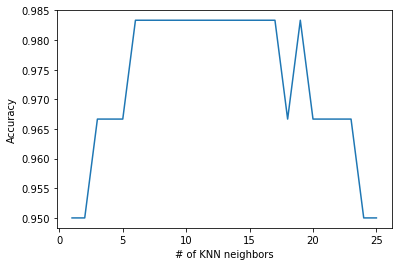

In [37]:
plt.plot(i_range, scores)
plt.xlabel("# of KNN neighbors")
plt.ylabel("Accuracy")

KNN ~(6-17) has better accuracy than KNN 5